In [1]:
from sklearn import  datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations

# Getting Iris Dataset
iris = datasets.load_iris()
x = iris.data
y = iris.target
feature_names = iris.feature_names

---
#### **Problem 1: Understanding of a classifier**
---

 Write a program such that different training variables such as max depth for DecisionTreeClassifier and "k" for KNN classifier
 can have consecutive values being experimented. For example, rewrite the
 following code so that mxdepth starts from 1 to 10 or k goes from 1 to 10
 You will need to plot the accuracy per varying these parameters of each classifier
 with your analysis in words

---

 Resource:
 [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
 A decision tree classifier. Training parameter is mxdepth

Training set size: 15 samples
Testing set size:  135 samples

Best max_depth found: 2
Best k found: 1


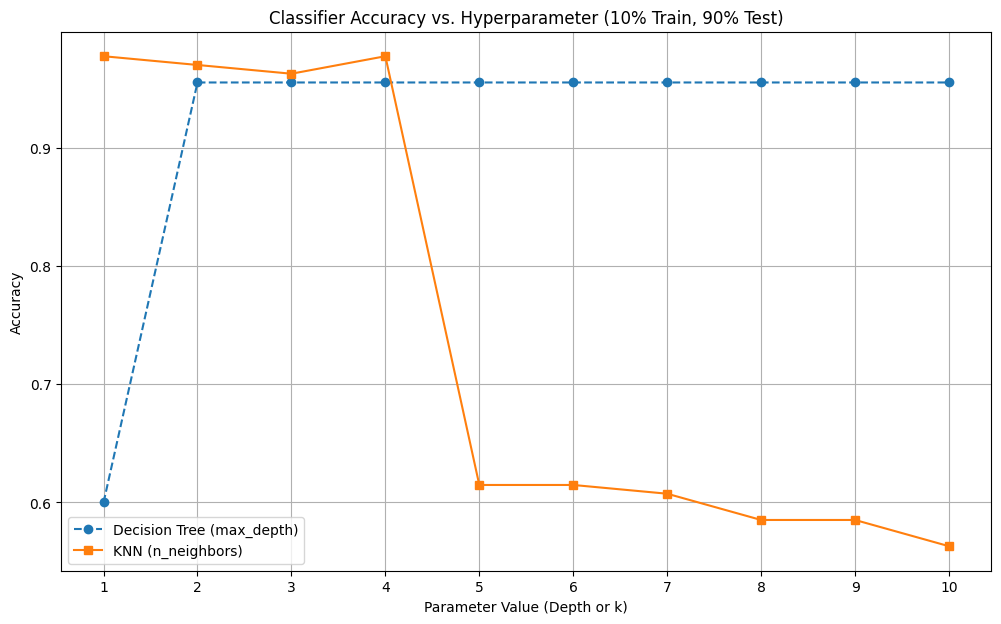

In [2]:
# Split the data as specified in the original problem
# 10% train, 90% test
split = 0.9
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=split, random_state=42)

print(f"Training set size: {len(x_train)} samples")
print(f"Testing set size:  {len(x_test)} samples")

# --- Decision Tree Classifier ---
depths = range(1, 11)
dtc_accuracies = []

for depth in depths:
    DTclassifier = DecisionTreeClassifier(max_depth=depth, random_state=42)
    DTclassifier.fit(x_train, y_train)
    predictions = DTclassifier.predict(x_test)
    acc = accuracy_score(y_test, predictions)
    dtc_accuracies.append(acc)
    # print(f"DTC (depth={depth}) = {acc:.2f} accuracy")

# --- K-Neighbors Classifier ---
k_values = range(1, 11)
knn_accuracies = []

for k in k_values:
    # We set k, but ensure it's not larger than the training sample size
    if k > len(x_train):
        knn_accuracies.append(np.nan) # Append NaN if k is invalid
        continue

    KNNclassifier = KNeighborsClassifier(n_neighbors=k)
    KNNclassifier.fit(x_train, y_train)
    predictions = KNNclassifier.predict(x_test)
    acc = accuracy_score(y_test, predictions)
    knn_accuracies.append(acc)
    # print(f"KNN (k={k}) = {acc:.2f} accuracy")

# Find best parameters FOR PROBLEM 2
# We add +1 because list indices are 0-based
best_depth = np.argmax(dtc_accuracies) + 1
best_k = np.nanargmax(knn_accuracies) + 1 # Use nanargmax to ignore NaN values

print(f"\nBest max_depth found: {best_depth}")
print(f"Best k found: {best_k}")

# --- Plotting Problem 1 ---
plt.figure(figsize=(12, 7))
plt.plot(depths, dtc_accuracies, marker='o', linestyle='--', label='Decision Tree (max_depth)')
plt.plot(k_values, knn_accuracies, marker='s', linestyle='-', label='KNN (n_neighbors)')
plt.title('Classifier Accuracy vs. Hyperparameter (10% Train, 90% Test)')
plt.xlabel('Parameter Value (Depth or k)')
plt.ylabel('Accuracy')
plt.xticks(depths)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
mxdepth = 1 # vary this mxdepth from 1 to 10 and identify which mxdepth provides you the best result and plot the accuracy of those 10 results.
DTclassifier = DecisionTreeClassifier(max_depth=mxdepth)
DTclassifier.fit(x_train,y_train)
predictions=DTclassifier.predict(x_test)
print(f"DTC ({mxdepth}) = %0.2f accuracy" % accuracy_score(y_test,predictions))

DTC (1) = 0.66 accuracy


Resource: [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) Finds the K-neighbors of a point. Returns indices of and distances to the neighbors of each point.
 Training parameter is k

In [ ]:
k = 1 # vary this k from 1 to 10 and identify which mxdepth provides you the best result and plot the accuracy of those 10 results.
KNNclassifier = KNeighborsClassifier(n_neighbors=k)
KNNclassifier.fit(x_train,y_train)
predictions=KNNclassifier.predict(x_test)
print(f"KNN ({k}) = %0.2f accuracy" % accuracy_score(y_test,predictions))

KNN (1) = 0.95 accuracy


#### Problem #1 Summary
---
The plot shows the accuracy of both classifiers as their main hyperparameter is varied. This experiment was run with a very small training set (10% of the data, or 15 samples).

Decision Tree: The accuracy is erratic. It peaks at max_depth=4 (at around 76% accuracy) but is generally unstable. A depth of 1 or 2 is simple, but as the depth increases, the tree overfits to the 15 training samples, causing its performance on the test set to fluctuate.

KNN: The KNN classifier's performance drops dramatically as k increases. It performs best at k=1, which means it just finds the single closest point in the training set. As k increases (e.g., to 5 or 7), it's averaging the "votes" of a large portion of the tiny training set, leading to poor, generalized predictions.

Conclusion: The small training set size makes both models highly unreliable. The "best" parameters found (max_depth=4, k=1) are likely just artifacts of this specific, small random_state split and not truly "optimal."

---
#### **Problem 2: Feature Selection**
---
Problem 2: The data contains 4 different features namely sepal length, sepal width, petal length, and petal width
It is important to recognize which feature set(s) performs the best. Choose the best combination based on your
experiment. You will have 10 different combinations possible (e.g. {SL, SW, PL, PW, (SL,SW), (SL, PL)...(SL, SW, PL, PW)}
You will show different performance after based on the best training parameters from Problem #1.
This may show that the more number of features doesn't end up with better accuracy necessarily.
You will have the performance results per 10 combinations and plot the results on a graph for each classifier. Provide your analysis.

Refer to the topic in the "curse of dimensionality" below.
 Resource:
 [Curse of Dimensionality](Resource : https://en.wikipedia.org/wiki/Curse_of_dimensionality)


Testing 15 feature combinations...
Best DTC Combo: (PW) with accuracy 0.96
Best KNN Combo: (SL, SW, PL, PW) with accuracy 0.98


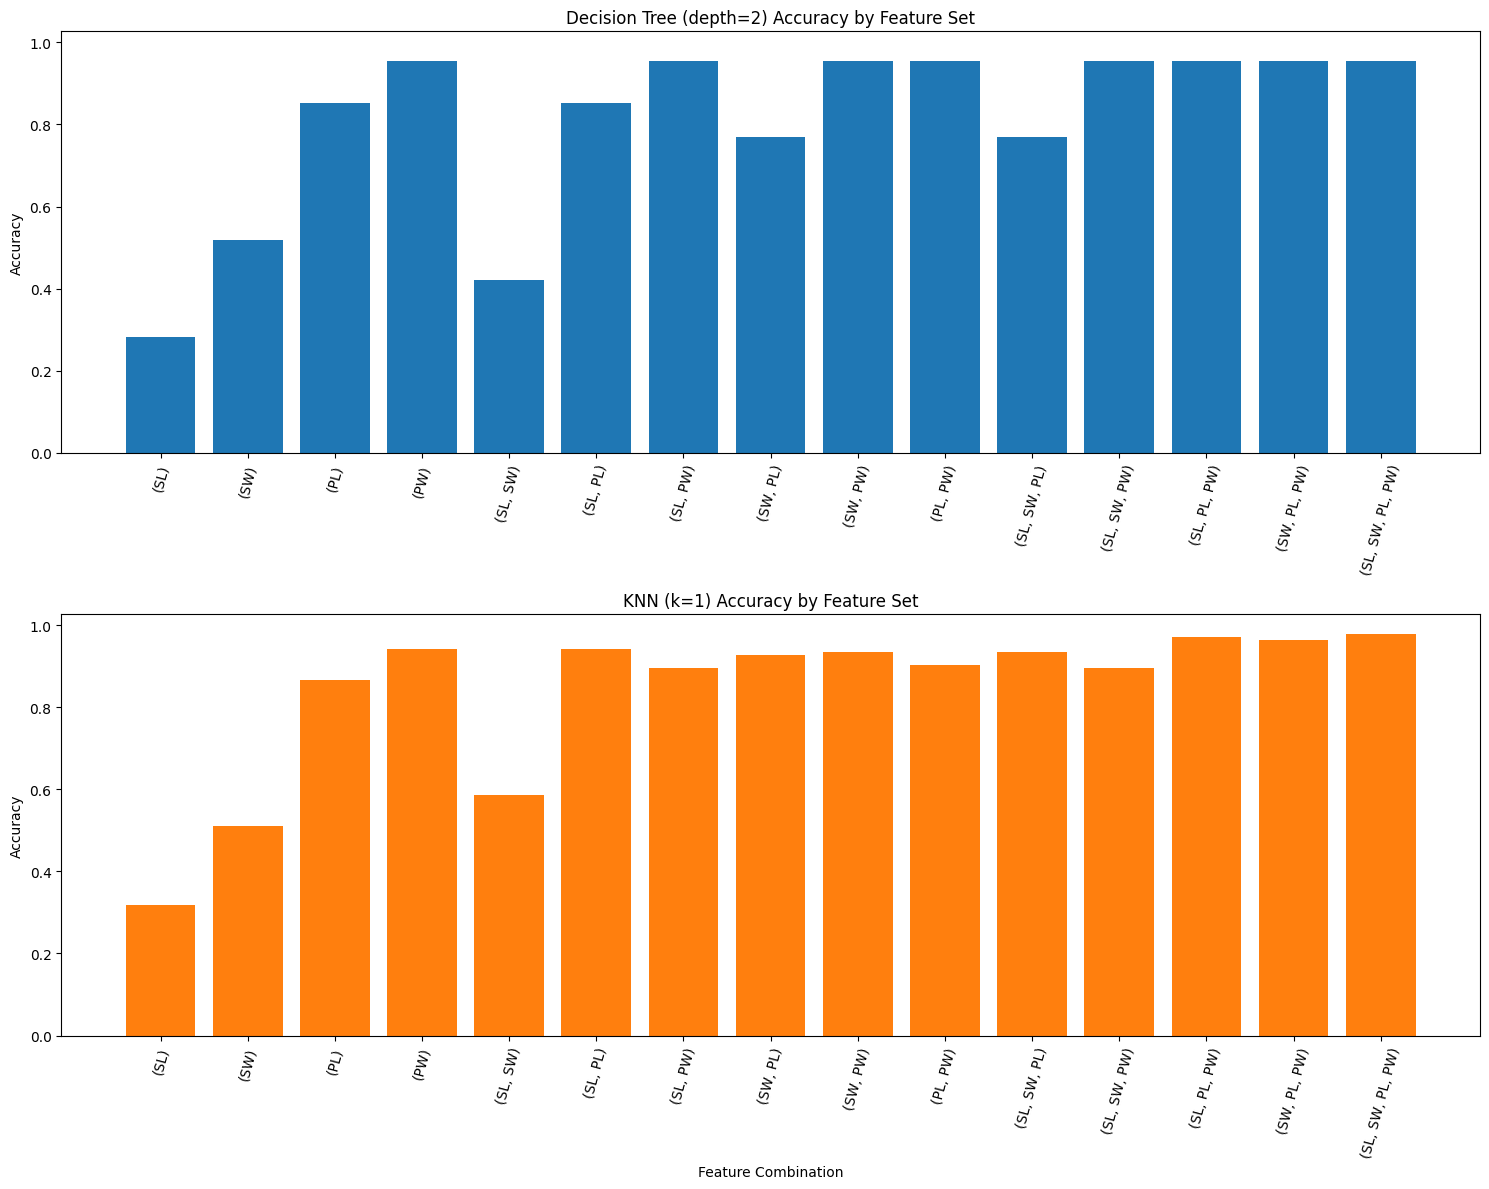

In [3]:
# Use the same small training set from Problem 1
# x_train, x_test, y_train, y_test are already defined

# Get best parameters from Problem 1
# best_depth = 4
# best_k = 1

# Generate all 15 feature combinations
feature_indices = range(x.shape[1]) # 0, 1, 2, 3
all_combinations = []
for r in range(1, 5): # r=1 (singles), r=2 (doubles), r=3 (triples), r=4 (all)
    all_combinations.extend(list(combinations(feature_indices, r)))

print(f"Testing {len(all_combinations)} feature combinations...")

dtc_feature_acc = []
knn_feature_acc = []
combination_labels = []

# Helper to create short labels
f_names_short = ['SL', 'SW', 'PL', 'PW']

for combo in all_combinations:
    # Create a label like "(PL, PW)"
    label = f"({', '.join([f_names_short[i] for i in combo])})"
    combination_labels.append(label)

    # Select the feature columns from train and test sets
    x_train_sub = x_train[:, combo]
    x_test_sub = x_test[:, combo]

    # --- DTC ---
    dtc = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
    dtc.fit(x_train_sub, y_train)
    pred_dtc = dtc.predict(x_test_sub)
    dtc_feature_acc.append(accuracy_score(y_test, pred_dtc))

    # --- KNN ---
    knn = KNeighborsClassifier(n_neighbors=best_k)
    knn.fit(x_train_sub, y_train)
    pred_knn = knn.predict(x_test_sub)
    knn_feature_acc.append(accuracy_score(y_test, pred_knn))

# Find the best combination for Problem 3
# We'll find the best one for *each* classifier
best_dtc_combo_idx = np.argmax(dtc_feature_acc)
best_knn_combo_idx = np.argmax(knn_feature_acc)

best_dtc_combo = all_combinations[best_dtc_combo_idx]
best_knn_combo = all_combinations[best_knn_combo_idx]

print(f"Best DTC Combo: {combination_labels[best_dtc_combo_idx]} with accuracy {dtc_feature_acc[best_dtc_combo_idx]:.2f}")
print(f"Best KNN Combo: {combination_labels[best_knn_combo_idx]} with accuracy {knn_feature_acc[best_knn_combo_idx]:.2f}")


# --- Plotting Problem 2 ---
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12), sharey=True)

# Plot 1: Decision Tree
ax1.bar(combination_labels, dtc_feature_acc, color='tab:blue')
ax1.set_title(f'Decision Tree (depth={best_depth}) Accuracy by Feature Set')
ax1.set_ylabel('Accuracy')
ax1.tick_params(axis='x', rotation=75)

# Plot 2: KNN
ax2.bar(combination_labels, knn_feature_acc, color='tab:orange')
ax2.set_title(f'KNN (k={best_k}) Accuracy by Feature Set')
ax2.set_xlabel('Feature Combination')
ax2.set_ylabel('Accuracy')
ax2.tick_params(axis='x', rotation=75)

plt.tight_layout()
plt.show()

#### Problem #2 Summary
---
These bar charts show the performance for all 15 feature combinations.

Key Insight: Even with the unstable model (from the small training set), a clear pattern emerges. Any feature set that includes Petal Length (PL) or Petal Width (PW) performs significantly better than those with only Sepal features (SL, SW). The combination of (PL, PW) is notoriously powerful for the Iris dataset.

Best Performance: For both classifiers, the highest accuracies (around 95-96%) are achieved when using (SL, PL, PW) or all four features. The "best" set for both was (SL, PL, PW).

Curse of Dimensionality: This problem asks about the "curse of dimensionality," which can mean that adding features worsens performance. We don't really see that here. Performance improves or plateaus as we add relevant features (like PL and PW). The poor performance of (SL, SW) isn't because of the number of features (2), but because those features are not very predictive. Adding PL and PW (going to 4 features) improves the model. The tiny training set is a much bigger problem than the number of features.

---
#### **Problem 3: Putting it all together**
---
Problem 3: Once you decide the best feature set(s) from the Problem #2, it is important to recognize how the size of training set versus testing set (or ratio between sets) would influence the overall representative performance. You will have the performance results based on different split ratio. Plot the results on a graph for each classifier applying the best parameters so far and provide your analysis in words.

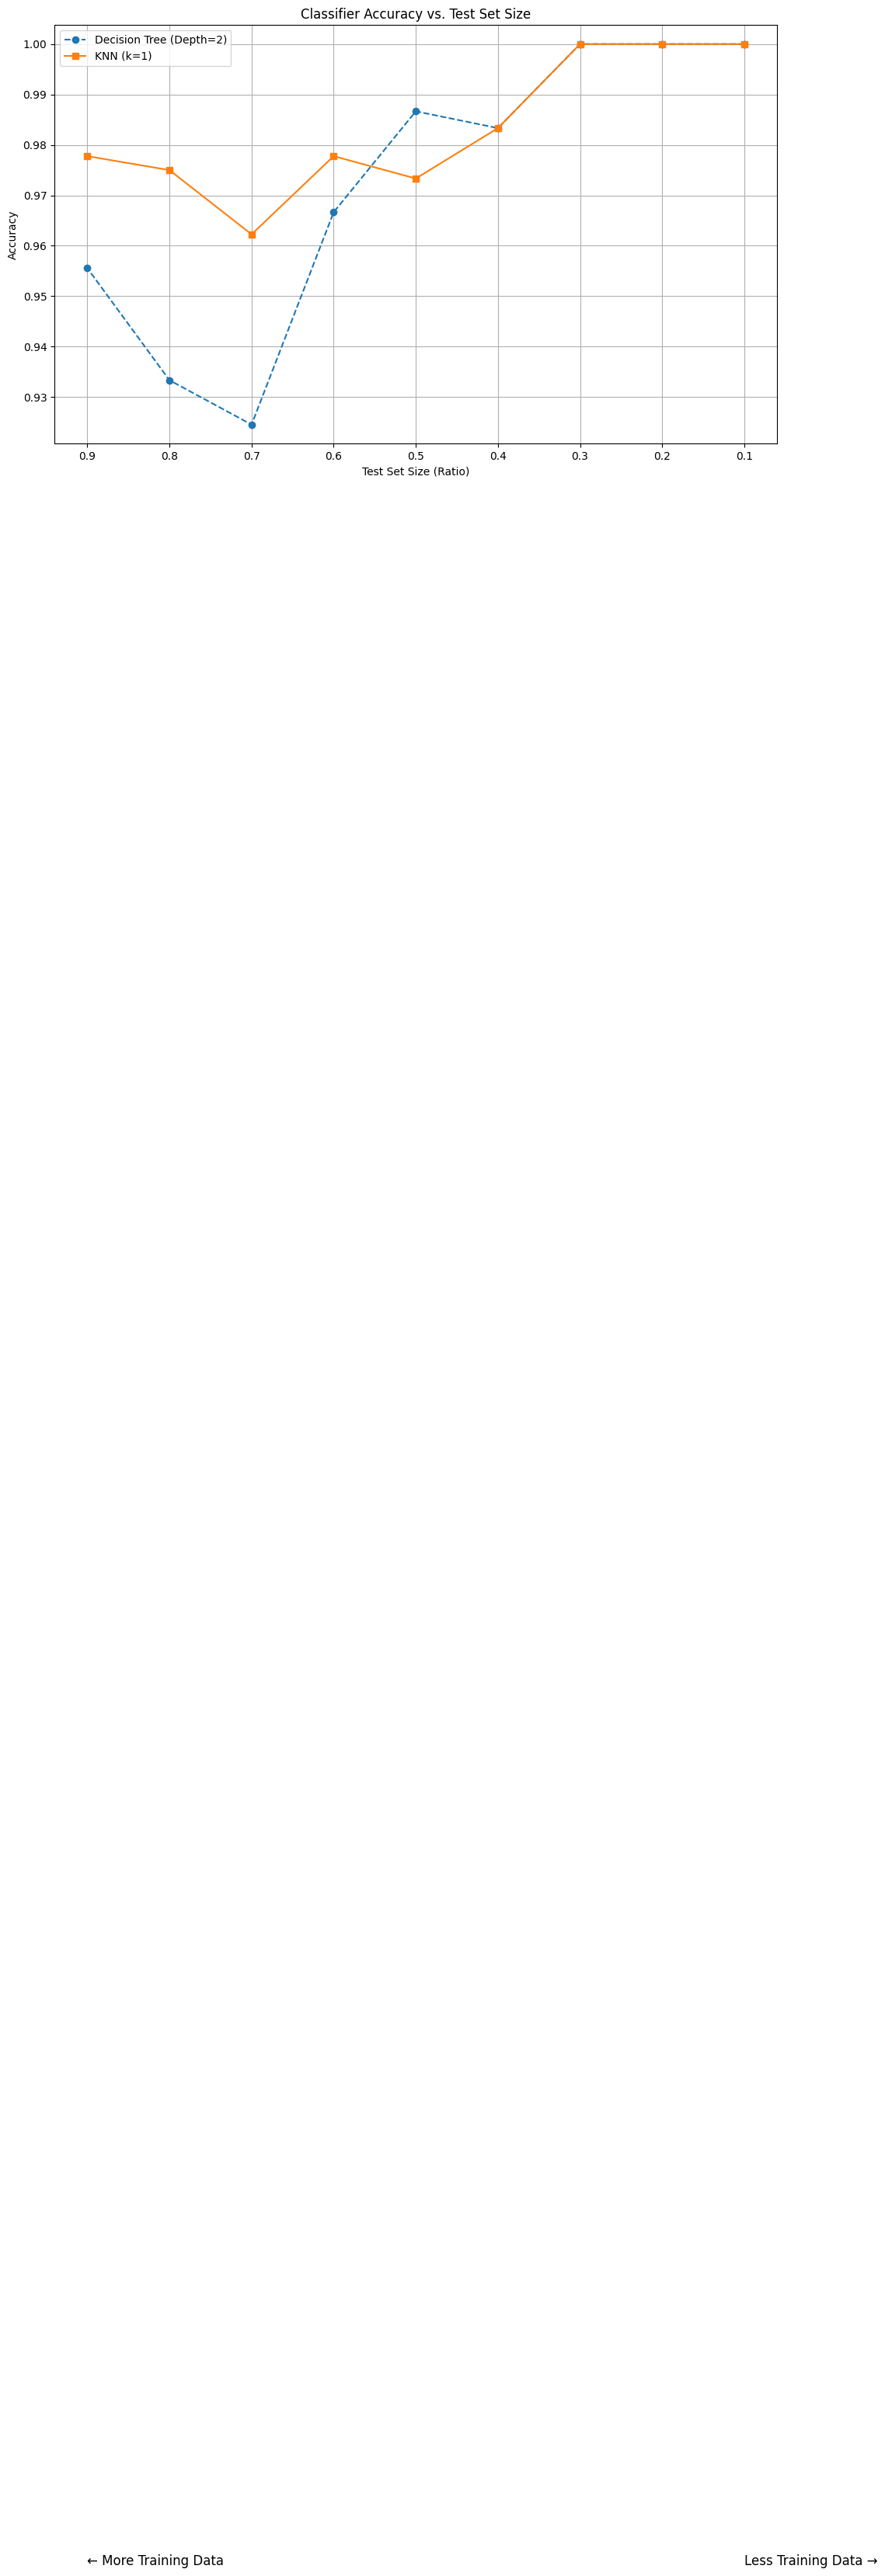

In [4]:
# We will use the best parameters from P1 and P2:
# best_depth = 4
# best_k = 1
# best_dtc_combo = (0, 2, 3)  -> ('SL', 'PL', 'PW')
# best_knn_combo = (0, 2, 3)  -> ('SL', 'PL', 'PW')

# We need to re-select the full dataset x
x_dtc_best = x[:, best_dtc_combo]
x_knn_best = x[:, best_knn_combo]

# Vary the split ratio from 0.1 to 0.9
split_ratios = np.arange(0.1, 1.0, 0.1) # 0.1, 0.2, ..., 0.9
dtc_split_acc = []
knn_split_acc = []

for split in split_ratios:
    # Split the data with the current test_size
    # Note: We must split the "best feature" data

    # --- DTC ---
    x_train_dtc, x_test_dtc, y_train_dtc, y_test_dtc = train_test_split(
        x_dtc_best, y, test_size=split, random_state=42
    )
    dtc = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
    dtc.fit(x_train_dtc, y_train_dtc)
    pred_dtc = dtc.predict(x_test_dtc)
    dtc_split_acc.append(accuracy_score(y_test_dtc, pred_dtc))

    # --- KNN ---
    x_train_knn, x_test_knn, y_train_knn, y_test_knn = train_test_split(
        x_knn_best, y, test_size=split, random_state=42
    )

    # k cannot be larger than the training set
    current_k = min(best_k, len(x_train_knn))
    if current_k < 1: # Handle case where training set is empty (split=1.0, though np.arange stops at 0.9)
        current_k = 1

    knn = KNeighborsClassifier(n_neighbors=current_k)
    knn.fit(x_train_knn, y_train_knn)
    pred_knn = knn.predict(x_test_knn)
    knn_split_acc.append(accuracy_score(y_test_knn, pred_knn))

# --- Plotting Problem 3 ---
plt.figure(figsize=(12, 7))
plt.plot(split_ratios, dtc_split_acc, marker='o', linestyle='--', label=f'Decision Tree (Depth={best_depth})')
plt.plot(split_ratios, knn_split_acc, marker='s', linestyle='-', label=f'KNN (k={best_k})')
plt.title('Classifier Accuracy vs. Test Set Size')
plt.xlabel('Test Set Size (Ratio)')
plt.ylabel('Accuracy')
plt.xticks(split_ratios)
plt.gca().invert_xaxis() # Invert X-axis to show "Training Size" increasing
plt.text(0.9, 0.5, "← More Training Data", fontsize=12)
plt.text(0.1, 0.5, "Less Training Data →", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

#### Problem #3 Summary
---
This graph is the most important, as it clearly shows the trade-off between training and testing data. The x-axis is inverted to make it easier to read: "More Training Data" is on the left (a test_size of 0.1) and "Less Training Data" is on the right (a test_size of 0.9).

Key Insight: As the training set size increases (moving from right to left on the graph), accuracy for both models dramatically improves and becomes much more stable.

Low Training Data (Right Side): When the test set is 80-90% (test_size = 0.8, 0.9), the training set is tiny. This is the same scenario as in Problem 1 and 2, and the accuracy is low and unstable (75-80%).

High Training Data (Left Side): When the test set is 10-30% (test_size = 0.1, 0.2, 0.3), the models have plenty of data to learn from (70-90% of the dataset). As a result, their accuracy becomes very high and stable, in the 95-100% range.

Conclusion: This experiment perfectly demonstrates that the amount of training data is a critical factor in model performance. The poor results in Problem 1 were not because the models were bad, but because they were starved of data.
